## Machine Learning

ML is meant to predict properties of unknown data. It is about learning properties from a dataset and applying them to new data

Supervised Learning: We already have recorded labeled Data and we are learning the link between two datasets x and y
    - Classification: Our sample belongs to a specific number of classes and we'd like to predict the class of unlabeled data
    - Regression: The desired output consists of several correlated continuous variables

Unsupervised Learning: Training Data without any corresponding target values. The goal is to discover groups of similar examples within the data (clustering).

### Scikit-Learn

Scikit-learn is a Python module integrating classic machine learning algorithms for 2D arrays datasets

#### Classification

In [188]:
import numpy as np
from sklearn import datasets # Import Default Datasets From Scikit-Learn
iris = datasets.load_iris()
iris_X = iris.data # X Axis, Features Of The Irises We Have
iris_y = iris.target # Y Axis, Actual Type Of Iris

iris_X.shape # We Have 150 Samples Of Irises, Described By 4 Features
# Preprocess The Data So It Can Have n Samples And n Features To Be Used By ScikitLearn

(150, 4)

In [189]:
# K-nearest neighbors classifier

# Split iris data in train and test data
# A random permutation, to split the data randomly
indices = np.random.permutation(len(iris_X))
iris_X_train = iris_X[indices[:-10]] # Training Set
iris_y_train = iris_y[indices[:-10]]
iris_X_test  = iris_X[indices[-10:]] # Testing Set
iris_y_test  = iris_y[indices[-10:]]

# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_y_train)  # The Algorithm Learns From The Training Values

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform')

In [190]:
knn.predict(iris_X_test) # The Algorithm Predicts Ys From Xs & Is ~90% Accurate

array([1, 2, 1, 2, 1, 0, 0, 0, 0, 2])

In [191]:
iris_y_test # Actual Ys

array([1, 2, 1, 2, 1, 0, 0, 0, 0, 2])

#### Regression

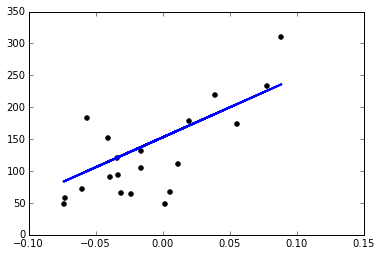

In [208]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

# Load the dataset
diabetes = datasets.load_diabetes()

# Split the data into training/testing sets
diabetes_X_train = diabetes_X_temp[:-20]
diabetes_X_test = diabetes_X_temp[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue',
         linewidth=2)

plt.show()

In [193]:
print round(regr.score(diabetes_X_test, diabetes_y_test), 2),"%"
# Correlation Coefficient. 1 = Perfect Predicition, 0 = No Relationship

0.47 %


#### Support Vector Machines

SVMs purpose is to find a plane maximixing the margin between two classes

In [194]:
from sklearn import svm
svc = svm.SVC(kernel='linear')
svc.fit(iris_X_train, iris_y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

An SVM is not necessarily Linear, it can also be radial:

In [195]:
svc = svm.SVC(kernel='rbf') # Clusters Groups Of Values In Radial Shapes

svc

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [196]:
from sklearn import datasets, svm # Evaluate The Percentage Of Accuracy Of An SVM
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target
svc = svm.SVC(C=1, kernel='linear')
print round(svc.fit(X_digits[:-100], y_digits[:-100]).score(X_digits[-100:], y_digits[-100:]), 2), "%"

0.98 %


#### Clustering

In [197]:
from sklearn import cluster, datasets
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target

k_means = cluster.KMeans(n_clusters=3) # Choose The Number Of Clusters Classifying Data
k_means.fit(X_iris) 

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [198]:
print(k_means.labels_[::10]) # Clusters Estimated By K-Means Clustering 

[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]


In [199]:
print(y_iris[::10]) # Actual Clusters

[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]


In [211]:
labels = k_means.labels_

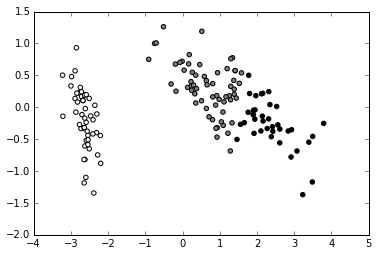

In [217]:
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=-labels)

#### Miscellaneous

In case of n>3-dimensional datasets, Principal Component Analysis (PCA) takes multiple columns and turns them into fewer columns while trying to preserve the unique information in each column. (to complete)